In [2]:
import pandas as pd
import numpy as np

In [3]:
df_customer_behavior = pd.read_csv('data/amazon_customer_behavior_data.csv')
df_customer_data = pd.read_csv('data/amazon_customers_data.csv')
df_product_catalog = pd.read_csv('data/amazon_product_catalog.csv')
df_sales_data = pd.read_csv('data/amazon_sales_data.csv')
df_subscriptions_data = pd.read_csv('data/amazon_subscriptions_data.csv')
df_transactions_data = pd.read_csv('data/amazon_transactions_data.csv')

In [4]:
def generate_data_quality_report(df):
    return {
        "missing_values": df.isnull().sum().to_dict(),
        "duplicate_rows": df.duplicated().sum(),
        "data_types": df.dtypes.astype(str).to_dict(),
        "total_rows": len(df)
    }

In [5]:
# Step 1: Organize your CSV-loaded DataFrames in a dictionary
csv_dataframes = {
    'Customer_Behavior': df_customer_behavior,
    'Customers': df_customer_data,
    'Products': df_product_catalog,
    'Sales': df_sales_data,
    'Subscriptions': df_subscriptions_data,
    'Transactions': df_transactions_data,
}

# Step 2: Reuse the same reporting logic
data_quality_reports = {name: generate_data_quality_report(df) for name, df in csv_dataframes.items()}

# View the report
data_quality_reports


{'Customer_Behavior': {'missing_values': {'CustomerID': 0,
   'TotalOrders': 0,
   'TotalSpent': 0,
   'AverageOrderValue': 0,
   'SubscriptionStatus': 0,
   'MostPurchasedCategory': 0,
   'PurchaseFrequency': 0,
   'LastOrderDate': 4,
   'CartAbandonmentRate': 0},
  'duplicate_rows': np.int64(0),
  'data_types': {'CustomerID': 'object',
   'TotalOrders': 'int64',
   'TotalSpent': 'float64',
   'AverageOrderValue': 'float64',
   'SubscriptionStatus': 'object',
   'MostPurchasedCategory': 'object',
   'PurchaseFrequency': 'object',
   'LastOrderDate': 'object',
   'CartAbandonmentRate': 'float64'},
  'total_rows': 1000},
 'Customers': {'missing_values': {'CustomerID': 0,
   'FirstName': 0,
   'LastName': 0,
   'Email': 0,
   'PhoneNumber': 0,
   'Address': 0,
   'DateOfBirth': 0,
   'Gender': 0,
   'RegistrationDate': 0,
   'Age': 0},
  'duplicate_rows': np.int64(0),
  'data_types': {'CustomerID': 'object',
   'FirstName': 'object',
   'LastName': 'object',
   'Email': 'object',
   'Pho

In [6]:
relationship_checks = {
    "Sales.CustomerID in Customers": df_sales_data["CustomerID"].isin(df_customer_data["CustomerID"]).all(),
    "Sales.ProductID in Products": df_sales_data["ProductID"].isin(df_product_catalog["ProductID"]).all(),
    "Subscriptions.CustomerID in Customers": df_subscriptions_data["CustomerID"].isin(df_customer_data["CustomerID"]).all(),
    "Subscriptions.ProductID in Products": df_subscriptions_data["ProductID"].isin(df_product_catalog["ProductID"]).all(),
    "Customer_Behavior.CustomerID in Customers": df_customer_behavior["CustomerID"].isin(df_customer_data["CustomerID"]).all()
}
relationship_checks

{'Sales.CustomerID in Customers': np.True_,
 'Sales.ProductID in Products': np.True_,
 'Subscriptions.CustomerID in Customers': np.True_,
 'Subscriptions.ProductID in Products': np.True_,
 'Customer_Behavior.CustomerID in Customers': np.True_}

## Preprocessing 

In [6]:
df_customer_data["DateOfBirth"] = pd.to_datetime(df_customer_data["DateOfBirth"], errors='coerce')
df_customer_data["RegistrationDate"] = pd.to_datetime(df_customer_data["RegistrationDate"], errors='coerce')

df_sales_data["OrderDate"] = pd.to_datetime(df_sales_data["OrderDate"], errors='coerce')

df_subscriptions_data["StartDate"] = pd.to_datetime(df_subscriptions_data["StartDate"], errors='coerce')
df_subscriptions_data["EndDate"] = pd.to_datetime(df_subscriptions_data["EndDate"], errors='coerce')

df_customer_behavior["LastOrderDate"] = pd.to_datetime(df_customer_behavior["LastOrderDate"], errors='coerce')


In [7]:
missing_dates_report = {
    "Customers.DateOfBirth": df_customer_data["DateOfBirth"].isna().sum(),
    "Customers.RegistrationDate": df_customer_data["RegistrationDate"].isna().sum(),
    "Sales.OrderDate": df_sales_data["OrderDate"].isna().sum(),
    "Subscriptions.StartDate": df_subscriptions_data["StartDate"].isna().sum(),
    "Subscriptions.EndDate": df_subscriptions_data["EndDate"].isna().sum(),
    "Customer_Behavior.LastOrderDate": df_customer_behavior["LastOrderDate"].isna().sum()
}
print("Missing Dates Report:\n", missing_dates_report)

Missing Dates Report:
 {'Customers.DateOfBirth': np.int64(0), 'Customers.RegistrationDate': np.int64(0), 'Sales.OrderDate': np.int64(0), 'Subscriptions.StartDate': np.int64(0), 'Subscriptions.EndDate': np.int64(0), 'Customer_Behavior.LastOrderDate': np.int64(4)}


In [8]:

registration_map = df_customer_data.set_index("CustomerID")["RegistrationDate"]

# Fill missing LastOrderDate using RegistrationDate
df_customer_behavior["LastOrderDate"] = df_customer_behavior.apply(
    lambda row: registration_map[row["CustomerID"]] if pd.isna(row["LastOrderDate"]) else row["LastOrderDate"],
    axis=1
)
print("Remaining missing LastOrderDate:", df_customer_behavior["LastOrderDate"].isna().sum())


Remaining missing LastOrderDate: 0


## EDA

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

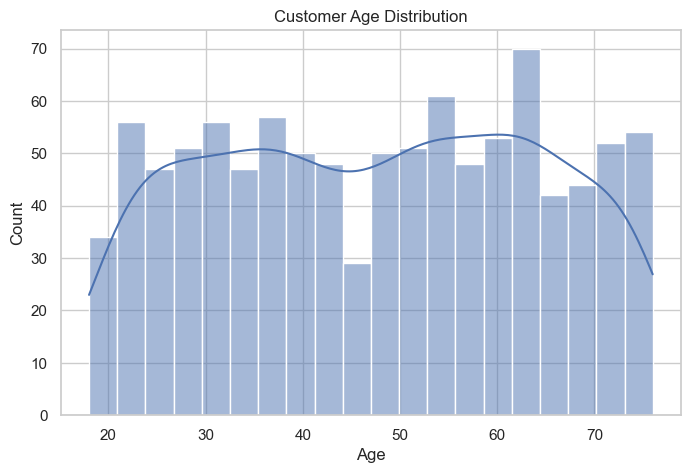

In [10]:
# 1. Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df_customer_data["Age"], bins=20, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

C:\Users\shashwata.as\AppData\Local\Temp\ipykernel_28308\3724880791.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_customer_data, x="Gender", palette="Set2")


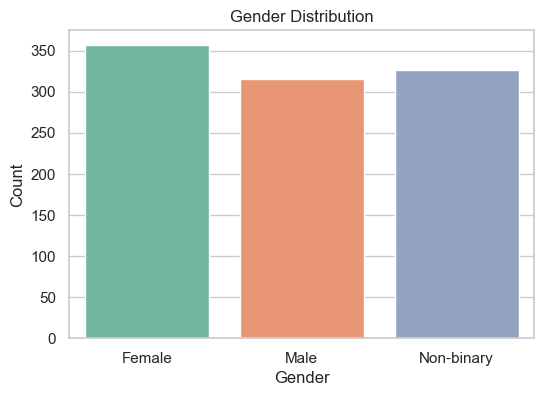

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_customer_data, x="Gender", palette="Set2")
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.show()

In [12]:
df_sales_merged = df_sales_data.merge(df_product_catalog[["ProductID", "Category"]], on="ProductID", how="left")


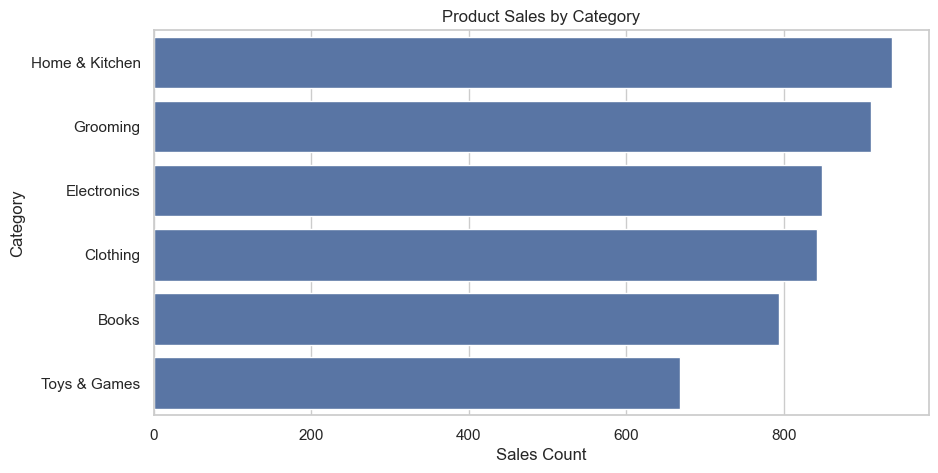

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df_sales_merged, y="Category", order=df_sales_merged["Category"].value_counts().index)
plt.title("Product Sales by Category")
plt.xlabel("Sales Count")
plt.ylabel("Category")
plt.show()

In [14]:
# Make sure StartDate and EndDate are datetime types
df_subscriptions_data["StartDate"] = pd.to_datetime(df_subscriptions_data["StartDate"], errors="coerce")
df_subscriptions_data["EndDate"] = pd.to_datetime(df_subscriptions_data["EndDate"], errors="coerce")

# Create SubscriptionDurationDays
df_subscriptions_data["SubscriptionDurationDays"] = (df_subscriptions_data["EndDate"] - df_subscriptions_data["StartDate"]).dt.days


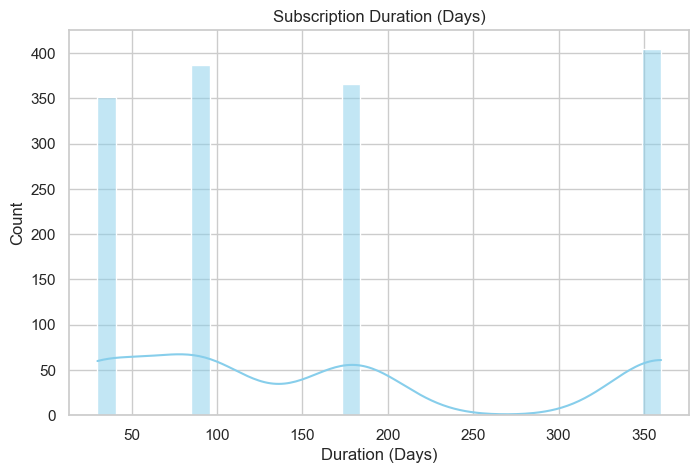

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df_subscriptions_data["SubscriptionDurationDays"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Subscription Duration (Days)")
plt.xlabel("Duration (Days)")
plt.ylabel("Count")
plt.show()

C:\Users\shashwata.as\AppData\Local\Temp\ipykernel_28308\1145610070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sales_data, x="PaymentMethod", palette="pastel", order=df_sales_data["PaymentMethod"].value_counts().index)


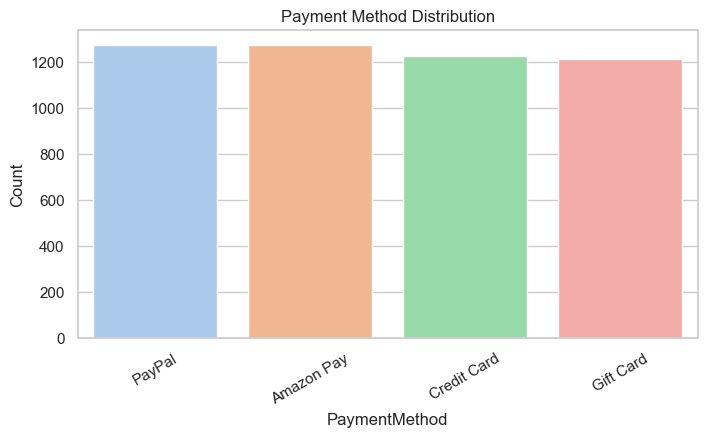

In [16]:
# 5. Payment Method Usage
plt.figure(figsize=(8, 4))
sns.countplot(data=df_sales_data, x="PaymentMethod", palette="pastel", order=df_sales_data["PaymentMethod"].value_counts().index)
plt.title("Payment Method Distribution")
plt.xticks(rotation=30)
plt.ylabel("Count")
plt.show()

### Model Prep

In [17]:
df_customer_data["HasSubscribed"] = df_customer_data["CustomerID"].isin(df_subscriptions_data["CustomerID"]).astype(int)
df_customer_data


,CustomerID,FirstName,LastName,Email,PhoneNumber,Address,DateOfBirth,Gender,RegistrationDate,Age,HasSubscribed
0,c24c93c2-6b6f-4a47-98c1-f0be7da12316,Christopher,West,christopher.west@yahoo.com,305.995.9865,"6229 Brianna Avenue, Pamelatown, AR, 96787",1964-12-07,Female,2020-12-31,61,1
1,0870636e-3c4a-49ae-b04e-040589002e8f,Christy,Hughes,christy.hughes@yahoo.com,+1-157-452-0541x6828,"80214 House Forest, Youngburgh, NV, 65588",1952-03-12,Male,2022-05-19,73,1
2,140edf79-fb7c-41b4-9bc3-b14ea1603ba9,Shawn,Hayes,shawn.hayes@hotmail.com,(475)765-1345x3253,"44843 Johnson Throughway, Vaughnton, MI, 48928",1962-10-29,Non-binary,2022-03-03,63,1
3,4b9ccfd4-373f-4665-8c47-0e263cbad01b,Christopher,Bowen,christopher.bowen@gmail.com,409.082.2023,"265 Joseph Course, Kevinville, CA, 71719",1983-06-11,Male,2020-09-14,42,0
4,1fe0a869-7f9d-458d-b60b-5319d8b671c2,Bobby,Graves,bobby.graves@yahoo.com,093-047-1067,"989 Horne Ville Apt. 125, Phillipstown, LA, 05863",2001-11-15,Female,2022-11-02,24,0
...,...,...,...,...,...,...,...,...,...,...,...
995,eb8cb5ca-e504-43de-ae9b-50c1620e7aff,Christina,Mcdonald,christina.mcdonald@yahoo.com,(046)274-5274,"199 Delacruz Locks Apt. 211, Walshside, MT, 12922",1957-10-03,Female,2023-07-04,68,1
996,ecca85a6-130c-4395-8d04-11df27d9dbe1,Tony,Smith,tony.smith@hotmail.com,(856)267-3115x557,"05232 Donald Route Suite 580, Amberfurt, LA, 8...",1986-08-14,Non-binary,2020-04-02,39,1
997,389836be-4160-4671-9f4b-133cc07b32cc,Anthony,Glenn,anthony.glenn@yahoo.com,(052)830-3313,"168 Miller Courts, Hodgesberg, NV, 06748",1972-03-25,Male,2020-09-14,53,1
998,60924ed5-02d4-4edd-97ee-c6a06c1bf0ff,Sharon,Norton,sharon.norton@yahoo.com,341.006.8001x9329,"5446 Johnson Walk, West Crystal, OH, 33516",1974-06-23,Female,2022-12-10,51,0


In [18]:
df_model = df_customer_data.copy()
df_model

,CustomerID,FirstName,LastName,Email,PhoneNumber,Address,DateOfBirth,Gender,RegistrationDate,Age,HasSubscribed
0,c24c93c2-6b6f-4a47-98c1-f0be7da12316,Christopher,West,christopher.west@yahoo.com,305.995.9865,"6229 Brianna Avenue, Pamelatown, AR, 96787",1964-12-07,Female,2020-12-31,61,1
1,0870636e-3c4a-49ae-b04e-040589002e8f,Christy,Hughes,christy.hughes@yahoo.com,+1-157-452-0541x6828,"80214 House Forest, Youngburgh, NV, 65588",1952-03-12,Male,2022-05-19,73,1
2,140edf79-fb7c-41b4-9bc3-b14ea1603ba9,Shawn,Hayes,shawn.hayes@hotmail.com,(475)765-1345x3253,"44843 Johnson Throughway, Vaughnton, MI, 48928",1962-10-29,Non-binary,2022-03-03,63,1
3,4b9ccfd4-373f-4665-8c47-0e263cbad01b,Christopher,Bowen,christopher.bowen@gmail.com,409.082.2023,"265 Joseph Course, Kevinville, CA, 71719",1983-06-11,Male,2020-09-14,42,0
4,1fe0a869-7f9d-458d-b60b-5319d8b671c2,Bobby,Graves,bobby.graves@yahoo.com,093-047-1067,"989 Horne Ville Apt. 125, Phillipstown, LA, 05863",2001-11-15,Female,2022-11-02,24,0
...,...,...,...,...,...,...,...,...,...,...,...
995,eb8cb5ca-e504-43de-ae9b-50c1620e7aff,Christina,Mcdonald,christina.mcdonald@yahoo.com,(046)274-5274,"199 Delacruz Locks Apt. 211, Walshside, MT, 12922",1957-10-03,Female,2023-07-04,68,1
996,ecca85a6-130c-4395-8d04-11df27d9dbe1,Tony,Smith,tony.smith@hotmail.com,(856)267-3115x557,"05232 Donald Route Suite 580, Amberfurt, LA, 8...",1986-08-14,Non-binary,2020-04-02,39,1
997,389836be-4160-4671-9f4b-133cc07b32cc,Anthony,Glenn,anthony.glenn@yahoo.com,(052)830-3313,"168 Miller Courts, Hodgesberg, NV, 06748",1972-03-25,Male,2020-09-14,53,1
998,60924ed5-02d4-4edd-97ee-c6a06c1bf0ff,Sharon,Norton,sharon.norton@yahoo.com,341.006.8001x9329,"5446 Johnson Walk, West Crystal, OH, 33516",1974-06-23,Female,2022-12-10,51,0


In [19]:
df_model = df_model.merge(df_customer_behavior, on="CustomerID", how="left")

In [20]:
sales_agg = df_sales_data.groupby("CustomerID").agg({
    "TotalPrice": "sum",
    "ProductID": "count",
    "PaymentMethod": lambda x: x.mode()[0] if not x.mode().empty else np.nan
}).rename(columns={
    "TotalAmount": "TotalSpent",
    "ProductID": "TotalOrders",
    "PaymentMethod": "PreferredPaymentMethod"
}).reset_index()

df_model = df_model.merge(sales_agg, on="CustomerID", how="left")

In [21]:
df_model

,CustomerID,FirstName,LastName,Email,PhoneNumber,Address,DateOfBirth,Gender,RegistrationDate,Age,...,TotalSpent,AverageOrderValue,SubscriptionStatus,MostPurchasedCategory,PurchaseFrequency,LastOrderDate,CartAbandonmentRate,TotalPrice,TotalOrders_y,PreferredPaymentMethod
0,c24c93c2-6b6f-4a47-98c1-f0be7da12316,Christopher,West,christopher.west@yahoo.com,305.995.9865,"6229 Brianna Avenue, Pamelatown, AR, 96787",1964-12-07,Female,2020-12-31,61,...,29228.53,4175.50,Active,Toys & Games,Medium,2025-03-02,26.69,29228.53,7.0,PayPal
1,0870636e-3c4a-49ae-b04e-040589002e8f,Christy,Hughes,christy.hughes@yahoo.com,+1-157-452-0541x6828,"80214 House Forest, Youngburgh, NV, 65588",1952-03-12,Male,2022-05-19,73,...,9274.04,2318.51,Active,Grooming,Low,2024-12-28,29.10,9274.04,4.0,PayPal
2,140edf79-fb7c-41b4-9bc3-b14ea1603ba9,Shawn,Hayes,shawn.hayes@hotmail.com,(475)765-1345x3253,"44843 Johnson Throughway, Vaughnton, MI, 48928",1962-10-29,Non-binary,2022-03-03,63,...,22359.48,3194.21,Active,Home & Kitchen,Medium,2025-01-27,11.10,22359.48,7.0,Gift Card
3,4b9ccfd4-373f-4665-8c47-0e263cbad01b,Christopher,Bowen,christopher.bowen@gmail.com,409.082.2023,"265 Joseph Course, Kevinville, CA, 71719",1983-06-11,Male,2020-09-14,42,...,13870.42,2774.08,Inactive,Home & Kitchen,Low,2024-09-12,32.04,13870.42,5.0,Credit Card
4,1fe0a869-7f9d-458d-b60b-5319d8b671c2,Bobby,Graves,bobby.graves@yahoo.com,093-047-1067,"989 Horne Ville Apt. 125, Phillipstown, LA, 05863",2001-11-15,Female,2022-11-02,24,...,4553.62,2276.81,Inactive,Grooming,Low,2024-04-09,18.70,4553.62,2.0,Amazon Pay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,eb8cb5ca-e504-43de-ae9b-50c1620e7aff,Christina,Mcdonald,christina.mcdonald@yahoo.com,(046)274-5274,"199 Delacruz Locks Apt. 211, Walshside, MT, 12922",1957-10-03,Female,2023-07-04,68,...,14811.19,3702.80,Active,Toys & Games,Low,2025-01-12,38.80,14811.19,4.0,Amazon Pay
996,ecca85a6-130c-4395-8d04-11df27d9dbe1,Tony,Smith,tony.smith@hotmail.com,(856)267-3115x557,"05232 Donald Route Suite 580, Amberfurt, LA, 8...",1986-08-14,Non-binary,2020-04-02,39,...,16829.16,2804.86,Active,Books,Medium,2025-02-28,43.87,16829.16,6.0,Gift Card
997,389836be-4160-4671-9f4b-133cc07b32cc,Anthony,Glenn,anthony.glenn@yahoo.com,(052)830-3313,"168 Miller Courts, Hodgesberg, NV, 06748",1972-03-25,Male,2020-09-14,53,...,8990.61,1798.12,Active,Home & Kitchen,Low,2025-01-25,2.10,8990.61,5.0,Amazon Pay
998,60924ed5-02d4-4edd-97ee-c6a06c1bf0ff,Sharon,Norton,sharon.norton@yahoo.com,341.006.8001x9329,"5446 Johnson Walk, West Crystal, OH, 33516",1974-06-23,Female,2022-12-10,51,...,5421.77,1807.26,Inactive,Electronics,Low,2025-01-11,35.53,5421.77,3.0,Gift Card


In [22]:
df_model["LastOrderDate"] = pd.to_datetime(df_model["LastOrderDate"], errors="coerce")
df_model["DaysSinceLastOrder"] = (pd.Timestamp("today") - df_model["LastOrderDate"]).dt.days


In [23]:
df_model["HasSubscribed"] = df_model["CustomerID"].isin(df_subscriptions_data["CustomerID"]).astype(int)
# Step 1: Calculate TotalOrders from df_sales
order_counts = df_sales_data.groupby("CustomerID")["OrderID"].nunique().reset_index()
order_counts.rename(columns={"OrderID": "TotalOrders"}, inplace=True)

# Step 2: Merge into df_model
df_model = df_model.merge(order_counts, on="CustomerID", how="left")

# Optional: Fill missing TotalOrders with 0 (for customers who haven't ordered yet)
df_model["TotalOrders"] = df_model["TotalOrders"].fillna(0).astype(int)
df_model.head()

,CustomerID,FirstName,LastName,Email,PhoneNumber,Address,DateOfBirth,Gender,RegistrationDate,Age,...,SubscriptionStatus,MostPurchasedCategory,PurchaseFrequency,LastOrderDate,CartAbandonmentRate,TotalPrice,TotalOrders_y,PreferredPaymentMethod,DaysSinceLastOrder,TotalOrders
0,c24c93c2-6b6f-4a47-98c1-f0be7da12316,Christopher,West,christopher.west@yahoo.com,305.995.9865,"6229 Brianna Avenue, Pamelatown, AR, 96787",1964-12-07,Female,2020-12-31,61,...,Active,Toys & Games,Medium,2025-03-02,26.69,29228.53,7.0,PayPal,40,7
1,0870636e-3c4a-49ae-b04e-040589002e8f,Christy,Hughes,christy.hughes@yahoo.com,+1-157-452-0541x6828,"80214 House Forest, Youngburgh, NV, 65588",1952-03-12,Male,2022-05-19,73,...,Active,Grooming,Low,2024-12-28,29.10,9274.04,4.0,PayPal,104,4
2,140edf79-fb7c-41b4-9bc3-b14ea1603ba9,Shawn,Hayes,shawn.hayes@hotmail.com,(475)765-1345x3253,"44843 Johnson Throughway, Vaughnton, MI, 48928",1962-10-29,Non-binary,2022-03-03,63,...,Active,Home & Kitchen,Medium,2025-01-27,11.10,22359.48,7.0,Gift Card,74,7
3,4b9ccfd4-373f-4665-8c47-0e263cbad01b,Christopher,Bowen,christopher.bowen@gmail.com,409.082.2023,"265 Joseph Course, Kevinville, CA, 71719",1983-06-11,Male,2020-09-14,42,...,Inactive,Home & Kitchen,Low,2024-09-12,32.04,13870.42,5.0,Credit Card,211,5
4,1fe0a869-7f9d-458d-b60b-5319d8b671c2,Bobby,Graves,bobby.graves@yahoo.com,093-047-1067,"989 Horne Ville Apt. 125, Phillipstown, LA, 05863",2001-11-15,Female,2022-11-02,24,...,Inactive,Grooming,Low,2024-04-09,18.70,4553.62,2.0,Amazon Pay,367,2


In [24]:
# Average Order Value
df_model["AvgOrderValue"] = df_model["TotalSpent"] / (df_model["TotalOrders"] + 1)

# Customer Lifetime (days since registration)
df_model["RegistrationDate"] = pd.to_datetime(df_model["RegistrationDate"])
df_model["CustomerLifetime"] = (pd.Timestamp("today") - df_model["RegistrationDate"]).dt.days

# Subscription Ratio = TotalSpent / CustomerLifetime
df_model["SpendingRate"] = df_model["TotalSpent"] / (df_model["CustomerLifetime"] + 1)
df_model.head()

,CustomerID,FirstName,LastName,Email,PhoneNumber,Address,DateOfBirth,Gender,RegistrationDate,Age,...,LastOrderDate,CartAbandonmentRate,TotalPrice,TotalOrders_y,PreferredPaymentMethod,DaysSinceLastOrder,TotalOrders,AvgOrderValue,CustomerLifetime,SpendingRate
0,c24c93c2-6b6f-4a47-98c1-f0be7da12316,Christopher,West,christopher.west@yahoo.com,305.995.9865,"6229 Brianna Avenue, Pamelatown, AR, 96787",1964-12-07,Female,2020-12-31,61,...,2025-03-02,26.69,29228.53,7.0,PayPal,40,7,3653.566250,1562,18.700275
1,0870636e-3c4a-49ae-b04e-040589002e8f,Christy,Hughes,christy.hughes@yahoo.com,+1-157-452-0541x6828,"80214 House Forest, Youngburgh, NV, 65588",1952-03-12,Male,2022-05-19,73,...,2024-12-28,29.10,9274.04,4.0,PayPal,104,4,1854.808000,1058,8.757356
2,140edf79-fb7c-41b4-9bc3-b14ea1603ba9,Shawn,Hayes,shawn.hayes@hotmail.com,(475)765-1345x3253,"44843 Johnson Throughway, Vaughnton, MI, 48928",1962-10-29,Non-binary,2022-03-03,63,...,2025-01-27,11.10,22359.48,7.0,Gift Card,74,7,2794.935000,1135,19.682641
3,4b9ccfd4-373f-4665-8c47-0e263cbad01b,Christopher,Bowen,christopher.bowen@gmail.com,409.082.2023,"265 Joseph Course, Kevinville, CA, 71719",1983-06-11,Male,2020-09-14,42,...,2024-09-12,32.04,13870.42,5.0,Credit Card,211,5,2311.736667,1670,8.300670
4,1fe0a869-7f9d-458d-b60b-5319d8b671c2,Bobby,Graves,bobby.graves@yahoo.com,093-047-1067,"989 Horne Ville Apt. 125, Phillipstown, LA, 05863",2001-11-15,Female,2022-11-02,24,...,2024-04-09,18.70,4553.62,2.0,Amazon Pay,367,2,1517.873333,891,5.104955


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

In [26]:
features = [
    "Age", "Gender", "TotalSpent", "TotalOrders", "PreferredPaymentMethod", 
    "DaysSinceLastOrder", "AvgOrderValue", "SpendingRate", "CustomerLifetime"
]

target = "HasSubscribed"


In [27]:
X = df_model[features]
y = df_model[target]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
numeric_features = [
    "Age", "TotalSpent", "TotalOrders", "DaysSinceLastOrder",
    "AvgOrderValue", "SpendingRate", "CustomerLifetime"
]
categorical_features = ["Gender", "PreferredPaymentMethod"]

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.impute import SimpleImputer

In [31]:
numeric_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'TotalSpent', 'TotalOrders',
                                  'DaysSinceLastOrder', 'AvgOrderValue',
                                  'SpendingRate', 'CustomerLifetime']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Gender', 'PreferredPaymentMethod'])])

In [32]:
# pipeline = Pipeline(steps=[
#     ("preprocessor", preprocessor),
#     ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
# ])

In [ ]:
! pip install imblearn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train_processed, y_train)



In [34]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=3,
    class_weight="balanced",
    random_state=42
)

lr = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)

xgb = XGBClassifier(
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

In [35]:
ensemble_model = VotingClassifier(
    estimators=[
        ("rf", rf),
        ("lr", lr),
        ("xgb", xgb)
    ],
    voting="soft"
)

In [36]:
ensemble_model.fit(X_resampled, y_resampled)

d:\pyenv\GenAiTraining\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:53:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     min_samples_leaf=3,
                                                     n_estimators=300,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=1000,
                                                 random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [37]:
y_pred = ensemble_model.predict(X_test_processed)
y_proba = ensemble_model.predict_proba(X_test_processed)[:, 1]

In [38]:
from sklearn.metrics import precision_recall_curve


In [39]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.34      0.34        53
           1       0.82      0.83      0.83       197

    accuracy                           0.72       250
   macro avg       0.58      0.58      0.58       250
weighted avg       0.72      0.72      0.72       250

ROC AUC Score: 0.6553012163585863


In [40]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = ensemble_model.predict(X_test_processed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7240


### testing 


In [94]:
new_user = pd.DataFrame([{
    "Age": 34,
    "Gender": "Female",
    "TotalSpent": 1200,
    "TotalOrders": 8,
    "PreferredPaymentMethod": "Amazon Pay",
    "DaysSinceLastOrder": 15,
    "AvgOrderValue": 1200 / (8 + 1),  # 133.33
    "CustomerLifetime": 365,  # e.g., 1 year since registration
    "SpendingRate": 1200 / (365 + 1)  # ~3.28
}])


In [95]:
new_user_processed = preprocessor.transform(new_user)


NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Predict subscription (0 = No, 1 = Yes)
predicted_class = ensemble_model.predict(new_user_processed)[0]

# Predict probability of subscription
predicted_proba = ensemble_model.predict_proba(new_user_processed)[0][1]

print(f"Predicted class: {predicted_class}")
print(f"Probability of subscribing: {predicted_proba:.2f}")


NameError: name 'new_user_processed' is not defined

## testing 2

In [ ]:
import pandas as pd

new_users = pd.DataFrame([
    {
        # 🧑‍💼 High-spending long-time loyal customer
        "Age": 60,
        "Gender": "Female",
        "TotalSpent": 10000,
        "TotalOrders": 50,
        "PreferredPaymentMethod": "Amazon Pay",
        "DaysSinceLastOrder": 10,
        "AvgOrderValue": 10000 / (50 + 1),
        "CustomerLifetime": 900,  # nearly 2.5 years
        "SpendingRate": 10000 / (900 + 1)
    },
    {
        # 👨‍💻 Young tech-savvy male with moderate engagement
        "Age": 28,
        "Gender": "Male",
        "TotalSpent": 3500,
        "TotalOrders": 15,
        "PreferredPaymentMethod": "Credit Card",
        "DaysSinceLastOrder": 45,
        "AvgOrderValue": 3500 / (15 + 1),
        "CustomerLifetime": 540,
        "SpendingRate": 3500 / (540 + 1)
    },
    {
        # 👩‍🍼 New parent recently started using the platform
        "Age": 33,
        "Gender": "Female",
        "TotalSpent": 600,
        "TotalOrders": 5,
        "PreferredPaymentMethod": "PayPal",
        "DaysSinceLastOrder": 5,
        "AvgOrderValue": 600 / (5 + 1),
        "CustomerLifetime": 60,
        "SpendingRate": 600 / (60 + 1)
    },
    {
        # 🧑‍🎓 Student, low spending but frequent small orders
        "Age": 22,
        "Gender": "Non-Binary",
        "TotalSpent": 750,
        "TotalOrders": 25,
        "PreferredPaymentMethod": "UPI",
        "DaysSinceLastOrder": 2,
        "AvgOrderValue": 750 / (25 + 1),
        "CustomerLifetime": 180,
        "SpendingRate": 750 / (180 + 1)
    },
    {
        # 👴 Elderly customer, very old orders, not engaged recently
        "Age": 72,
        "Gender": "Male",
        "TotalSpent": 2000,
        "TotalOrders": 3,
        "PreferredPaymentMethod": "Net Banking",
        "DaysSinceLastOrder": 400,
        "AvgOrderValue": 2000 / (3 + 1),
        "CustomerLifetime": 1000,
        "SpendingRate": 2000 / (1000 + 1)
    }
])


In [ ]:
# Transform with the same preprocessor used for training
new_users_processed = preprocessor.transform(new_users)

# Predict class and probability
predicted_classes = clf.predict(new_users_processed)
predicted_probs = clf.predict_proba(new_users_processed)[:, 1]

# Combine everything in a nice table
results = new_users.copy()
results["PredictedClass"] = predicted_classes
results["SubscriptionProbability"] = predicted_probs

print(results)


   Age      Gender  TotalSpent  TotalOrders PreferredPaymentMethod  \
0   60      Female       10000           50             Amazon Pay   
1   28        Male        3500           15            Credit Card   
2   33      Female         600            5                 PayPal   
3   22  Non-Binary         750           25                    UPI   
4   72        Male        2000            3            Net Banking   

   DaysSinceLastOrder  AvgOrderValue  CustomerLifetime  SpendingRate  \
0                  10     196.078431               900     11.098779   
1                  45     218.750000               540      6.469501   
2                   5     100.000000                60      9.836066   
3                   2      28.846154               180      4.143646   
4                 400     500.000000              1000      1.998002   

   PredictedClass  SubscriptionProbability  
0               1                     0.90  
1               1                     0.77  
2          

In [41]:
import pickle

# Save model and preprocessor using pickle
with open("subscription_model.pkl", "wb") as model_file:
    pickle.dump(ensemble_model, model_file)

with open("subscription_preprocessor.pkl", "wb") as preprocessor_file:
    pickle.dump(preprocessor, preprocessor_file)



#### Understanding the feature importance

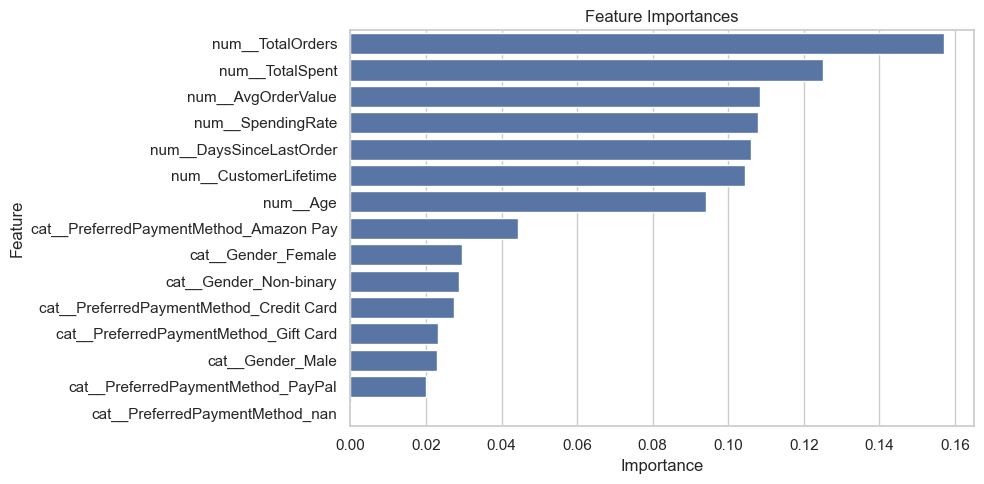

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_names = preprocessor.get_feature_names_out()
importances = clf.feature_importances_

feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp_df = feat_imp_df.sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


### Integrating Product recoommandation pipeline

In [90]:
# Merge sales and product data
purchase_history = df_sales_data.merge(df_product_catalog, on='ProductID', how='left')

# Get most frequently purchased product & category for each customer
customer_top_products = (
    purchase_history.groupby(['CustomerID', 'ProductID', 'Category'])
    .size()
    .reset_index(name='PurchaseCount')
    .sort_values(['CustomerID', 'PurchaseCount'], ascending=[True, False])
)

# Keep top 1 product per customer
top_recommendation = customer_top_products.drop_duplicates('CustomerID')
top_recommendation = top_recommendation.merge(
    df_product_catalog[['ProductID', 'ProductName']],
    on='ProductID',
    how='left'
)
top_recommendation.to_csv('top_recommendation.csv', index=False)


In [74]:
def recommend_for_customer(customer_id, model, preprocessor, input_features):
    input_processed = preprocessor.transform([input_features])
    prob = model.predict_proba(input_processed)[0][1]
    prediction = prob > 0.5

    # Fetch top product recommendation
    rec_row = top_recommendation[top_recommendation['CustomerID'] == customer_id]
    if not rec_row.empty:
        recommended_product = rec_row['ProductID'].values[0]
        recommended_category = rec_row['Category'].values[0]
    else:
        recommended_product = None
        recommended_category = None

    return {
        "SubscribePrediction": bool(prediction),
        "SubscriptionProbability": round(prob, 2),
        "RecommendedProductID": recommended_product,
        "RecommendedCategory": recommended_category
    }
